In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/test/0.jpg')

In [3]:
mean = cv2.blur(img,(5,5))

In [4]:
bilateral = cv2.bilateralFilter(img,9,75,75)

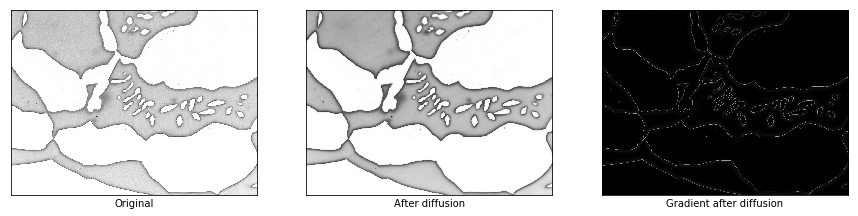

In [8]:
""" Perona Malik Diffusion
    for Edge Detection
"""

import numpy as np
from scipy import misc, ndimage
import matplotlib.pyplot as plt

# SETTINGS:
image_file = 'C:/test/0.jpg'
iterations = 20
delta = 0.14
kappa = 19

# convert input image
im = misc.imread(image_file, flatten=True)
im = im.astype('float64')

# initial condition
u = im

# center pixel distances
dx = 1
dy = 1
dd = np.sqrt(2)

# 2D finite difference windows
windows = [
    np.array(
            [[0, 1, 0], [0, -1, 0], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 0], [0, 1, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 1], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [1, -1, 0], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 1], [0, -1, 0], [0, 0, 0]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 0], [0, 0, 1]], np.float64
    ),
    np.array(
            [[0, 0, 0], [0, -1, 0], [1, 0, 0]], np.float64
    ),
    np.array(
            [[1, 0, 0], [0, -1, 0], [0, 0, 0]], np.float64
    ),
]

for r in range(iterations):
    # approximate gradients
    nabla = [ ndimage.filters.convolve(u, w) for w in windows ]

    # approximate diffusion function
    diff = [ 1./(1 + (n/kappa)**2) for n in nabla]

    # update image
    terms = [diff[i]*nabla[i] for i in range(4)]
    terms += [(1/(dd**2))*diff[i]*nabla[i] for i in range(4, 8)]
    u = u + delta*(sum(terms))


# Kernel for Gradient in x-direction
Kx = np.array(
    [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.int32
)
# Kernel for Gradient in y-direction
Ky = np.array(
    [[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.int32
)
# Apply kernels to the image
Ix = ndimage.filters.convolve(u, Kx)
Iy = ndimage.filters.convolve(u, Ky)

# return norm of (Ix, Iy)
G = np.hypot(Ix, Iy)
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1), plt.imshow(im, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.xlabel('Original')
plt.subplot(1, 3, 2), plt.imshow(u, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.xlabel('After diffusion')
plt.subplot(1, 3, 3), plt.imshow(G, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.xlabel('Gradient after diffusion')
plt.show()

In [9]:
import cv2
# load the image and perform pyramid mean shift filtering
image = cv2.imread("C:/test/0.png")
shifted = cv2.pyrMeanShiftFiltering(image, 10, 51)
cv2.imwrite('C:/segmented/mean_filter_segmentation0.png', shifted)

False